In [117]:
import pandas as pd
import pickle as pkl
import numpy as np

In [118]:
MPNET_RESULTS = '/data/laviniad/sermons-ir/modeling/mpnet_results'
with open(MPNET_RESULTS + "/data.pkl", "rb") as f:
    data = pkl.load(f)
print(data)

[[0.7238944582215334, 0.8968683956972072, 0.9246838123517498, 0.9281490086624156], [0.7234454811802415, 0.8849144942770449, 0.914602412976579, 0.9190430169638386], [0.7230672597236363, 0.8870696636522414, 0.9121191462103824, 0.916224182789791]]


In [119]:
data_n = np.asarray(data)
num_epochs = 3
print(np.max(data_n[:,num_epochs]))

0.9281490086624156


In [120]:
import sys
sys.path.append("/home/laviniad/projects/religion_in_congress/data/")
sys.path.append("/home/laviniad/projects/religion_in_congress/")

In [121]:
import re
from data.bible_utils import comp_bible_helper
import nltk

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

bible_df = comp_bible_helper()
pop_verses = pd.read_csv('/home/laviniad/projects/religion_in_congress/data/most_popular_verses.csv')
n = 500 # VERY generous
pop_citations = list(pop_verses['verse'].iloc[1:n+1])
bible_df['King James Bible'] = bible_df['King James Bible'].apply(remove_tags) # KJV in this df has italics etc
bible_df['Verse'] = bible_df['Verse'].apply(lambda x: x.lower())
limited_bible_df = bible_df[bible_df['Verse'].apply(lambda x: x in pop_citations)]
limited_verses = limited_bible_df['King James Bible']
verse_df = [{'text': t['King James Bible'], 'citation': t['citation']} for idx,t in limited_bible_df.iterrows()]
verse_df = pd.DataFrame(verse_df)
print(f"Number of verses: {len(verse_df.index)}")
limited_verse_to_citation = dict(zip(limited_verses, limited_bible_df['Verse']))
limited_citation_to_verse = {v.lower(): k for k,v in limited_verse_to_citation.items()}

Number of verses: 499


In [122]:
df = pd.read_csv('/data/laviniad/sermons-ir/modeling/mpnet_results/results.csv')
df.head()

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation
0,0,tensor(0),Ms. LOFGREN.,"NUN. Thy word is a lamp unto my feet, and a li...",0.282671,Psalm 119:105
1,1,tensor(0),"Madam Speaker, I rise today to honor Pastor Ke...","Go ye therefore, and teach all nations, baptiz...",0.351911,Matthew 28:19
2,2,tensor(0),I spoke three years ago on the impact he made ...,Then Peter and the other apostles answered and...,0.263514,Acts 5:29
3,3,tensor(0),He was a beloved member of our community whose...,And they continued stedfastly in the apostles'...,0.296643,Acts 2:42
4,4,tensor(0),Pastor Kenny Foreman dedicated his life to the...,These were more noble than those in Thessaloni...,0.462633,Acts 17:11


In [123]:
ranges = [(0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.0)]
for r in ranges:
    sample = df[(df['cosine_similarity'] >= r[0]) & (df['cosine_similarity'] < r[1])]
    sample = sample.sample(min(10, len(sample.index)))
    print("*" * 25 + f" Cosine similarity range: {r} " + "*" * 25)
    for t,v in zip(sample['text'], sample['most_similar_verse']):
        print("Congressional sentence: " + t)
        print("Bible verse: " + v)

************************* Cosine similarity range: (0.4, 0.5) *************************
Congressional sentence: The country in its founding documents posited these magnificent ideas based on faith, the endowment of our Creator, but then this openness and equality.
Bible verse: These were more noble than those in Thessalonica, in that they received the word with all readiness of mind, and searched the scriptures daily, whether those things were so.
Congressional sentence: And yet that is what this is all about.
Bible verse: And we know that all things work together for good to them that love God, to them who are the called according to his purpose.
Congressional sentence: I yield the floor.
Bible verse: Humble yourselves in the sight of the Lord, and he shall lift you up.
Congressional sentence: I am torn--deeply torn between this man and this moment.
Bible verse: The sacrifices of God are a broken spirit: a broken and a contrite heart, O God, thou wilt not despise.
Congressional senten

In [124]:
(df[df['cosine_similarity'] > 0.85])['verse_citation'].value_counts()

verse_citation
John 15:13      27
Matthew 5:9     22
John 3:16       13
Matthew 5:8     10
Matthew 5:16    10
                ..
Mark 10:45       1
Malachi 3:10     1
John 1:12        1
Romans 5:8       1
Romans 5:6       1
Name: count, Length: 124, dtype: int64

In [125]:
import torch

In [128]:
from data.congress_utils import induce_party_and_state, load_full_df_from_raw

In [129]:
congressional_df = load_full_df_from_raw('/data/corpora/congressional-record/')
congressional_df = induce_party_and_state(congressional_df)

On file 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106493/106493 [00:01<00:00, 98407.60it/s]


On file 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190933/190933 [00:01<00:00, 97109.64it/s]


On file 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94162/94162 [00:01<00:00, 92957.56it/s]


On file 3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207487/207487 [00:02<00:00, 89787.08it/s]


On file 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183503/183503 [00:02<00:00, 85661.81it/s]


On file 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 130265/130265 [00:01<00:00, 95155.11it/s]


On file 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197548/197548 [00:02<00:00, 85273.07it/s]


On file 7
On file 8


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139281/139281 [00:01<00:00, 94923.58it/s]


On file 9


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127268/127268 [00:01<00:00, 92948.69it/s]


On file 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179989/179989 [00:02<00:00, 86745.24it/s]


On file 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 271528/271528 [00:02<00:00, 94165.47it/s]


On file 12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48007/48007 [00:00<00:00, 99469.96it/s]


On file 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210379/210379 [00:02<00:00, 88748.70it/s]


On file 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196111/196111 [00:02<00:00, 85906.50it/s]


On file 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122717/122717 [00:01<00:00, 90214.97it/s]


In [130]:
from tqdm.notebook import tqdm

In [131]:
def get_party_and_year(idx):
    party = congressional_df.iloc[idx]['party']
    year = congressional_df.iloc[idx]['year']
    return party, year
    
party_list = []
year_list = []
for idx, row in tqdm(df.iterrows(), total=len(df.index)):
    sermon_idx = int(row['congress_idx'].replace('tensor(', '').replace(')', ''))
    party, year = get_party_and_year(idx)
    party_list.append(party)
    year_list.append(year)

  0%|          | 0/2188231 [00:00<?, ?it/s]

In [132]:
df['party'] = party_list
df['year'] = year_list

In [133]:
df['is_rep'] = (df['party'] == 'Republican').apply(int)

In [134]:
# import pearson r
from scipy.stats import pearsonr

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
import pandas as pd
from data.congress_utils import load_full_df_from_raw, induce_party_and_state, induce_topic
from data.data_utils import get_simple_overlap, get_relig_boolean
from tqdm import tqdm
import json

tqdm.pandas()

## constants
output_path = '/data/laviniad/sermons-ir/unified_congress_df_with_scores.json'
classifier_path = '/data/laviniad/congress_errata/idx_to_classifier_output.json'
bible_to_base_path = '/data/laviniad/congress_errata/idx_to_ppl_bible_and_base.json'
embedding_results = '/data/laviniad/sermons-ir/modeling/mpnet_results/results.csv'

DEBUG=True

## load data
print("Loading data")
congress_df = load_full_df_from_raw('/data/corpora/congressional-record', remove_procedural_speeches=True)
congress_df = induce_party_and_state(congress_df)
congress_df = induce_topic(congress_df)

Loading data
On file 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106493/106493 [00:01<00:00, 90906.26it/s]


On file 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190933/190933 [00:02<00:00, 89424.52it/s]


On file 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94162/94162 [00:01<00:00, 89385.00it/s]


On file 3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207487/207487 [00:02<00:00, 96954.67it/s]


On file 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183503/183503 [00:01<00:00, 94554.97it/s]


On file 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 130265/130265 [00:01<00:00, 98555.15it/s]


On file 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197548/197548 [00:02<00:00, 90581.44it/s]


On file 7
On file 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139281/139281 [00:01<00:00, 105864.88it/s]


On file 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127268/127268 [00:01<00:00, 101412.03it/s]


On file 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179989/179989 [00:01<00:00, 90371.86it/s]


On file 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 271528/271528 [00:02<00:00, 97627.16it/s]


On file 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48007/48007 [00:00<00:00, 102558.54it/s]


On file 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210379/210379 [00:02<00:00, 92490.48it/s]


On file 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 196111/196111 [00:01<00:00, 102231.60it/s]


On file 15


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122717/122717 [00:01<00:00, 104470.91it/s]


In [137]:
print("Getting max similar embeddings for verse reference")
embedding_results = '/data/laviniad/sermons-ir/modeling/mpnet_results/results.csv'
congress_df['official_index'] = congress_df.index.to_series()
mpnet_scores = pd.read_csv(embedding_results) # columns are congress_idx,text,most_similar_verse,cosine_similarity,verse_citation
mpnet_scores['congress_idx'] = mpnet_scores['congress_idx'].apply(lambda x: x.replace('tensor(', '').replace(')', '')).apply(int)

Getting max similar embeddings for verse reference


In [138]:
mpnet_scores.head()

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation
0,0,0,Ms. LOFGREN.,"NUN. Thy word is a lamp unto my feet, and a li...",0.282671,Psalm 119:105
1,1,0,"Madam Speaker, I rise today to honor Pastor Ke...","Go ye therefore, and teach all nations, baptiz...",0.351911,Matthew 28:19
2,2,0,I spoke three years ago on the impact he made ...,Then Peter and the other apostles answered and...,0.263514,Acts 5:29
3,3,0,He was a beloved member of our community whose...,And they continued stedfastly in the apostles'...,0.296643,Acts 2:42
4,4,0,Pastor Kenny Foreman dedicated his life to the...,These were more noble than those in Thessaloni...,0.462633,Acts 17:11


In [139]:
from data import data_utils

In [140]:
import importlib
importlib.reload(data_utils)

<module 'data.data_utils' from '/home/laviniad/projects/religion_in_congress/data/data_utils.py'>

In [141]:
## load nt and ot
mpnet_scores['testament_of_most_likely'] = mpnet_scores['verse_citation'].apply(data_utils.get_testament_of_citation)

In [142]:
mpnet_scores['testament_of_most_likely'].value_counts()

testament_of_most_likely
New Testament              1838357
Old Testament               186008
citation not valid book     163866
Name: count, dtype: int64

In [143]:
congress_df['party']

0            Democrat
1          Republican
2            Democrat
3          Republican
4          Republican
              ...    
2405661    Republican
2405663      Democrat
2405664      Democrat
2405667    Republican
2405669    Republican
Name: party, Length: 1328805, dtype: object

In [144]:
def get_party(congress_idx):
    if congress_idx in congress_df.index:
        return congress_df.loc[(congress_idx,'party')]
    else:
        return 'unlabeled'

mpnet_scores['party'] = mpnet_scores['congress_idx'].apply(get_party)

In [ ]:
def get_year(congress_idx):
    if congress_idx in congress_df.index:
        return congress_df.loc[(congress_idx,'year')]
    else:
        return 'unlabeled'

mpnet_scores['year'] = mpnet_scores['congress_idx'].apply(get_year)

In [145]:
print(mpnet_scores['congress_idx'].dtype)
print(congress_df.index.dtype)

int64
int64


In [146]:
filtered = mpnet_scores[mpnet_scores['cosine_similarity'] > 0.8]

In [170]:
filtered

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation,testament_of_most_likely,party,count
1067,1067,805,"As it says in the book of James, ``Blessed is ...",Blessed is the man that endureth temptation: f...,0.806908,James 1:12,New Testament,Republican,1
5872,5872,4496,May the words written in Matthew's Gospel comf...,Blessed are the peacemakers: for they shall be...,0.874124,Matthew 5:9,New Testament,Republican,1
13972,13972,12249,"Guide us, thine own, aright Teach us by day, b...","Obey them that have the rule over you, and sub...",0.815433,Hebrews 13:17,New Testament,Republican,1
20350,20350,19544,"We read in the New Testament these words, and ...","Greater love hath no man than this, that a man...",0.827184,John 15:13,New Testament,Democrat,1
23356,23356,22757,The Word tells us that the Lord is my strength...,Fear thou not; for I am with thee: be not dism...,0.833037,Isaiah 41:10,Old Testament,Republican,1
...,...,...,...,...,...,...,...,...,...
2184289,2184289,2402070,"For when we were still without strength, in du...","For when we were yet without strength, in due ...",0.980561,Romans 5:6,New Testament,Republican,1
2184291,2184291,2402070,Luke 2:11: ``For there is born to you this day...,For unto you is born this day in the city of D...,0.855709,Luke 2:11,New Testament,Republican,1
2187712,2187712,2404906,And the Lord will guide you continually and sa...,But whosoever drinketh of the water that I sha...,0.851279,John 4:14,New Testament,Democrat,1
2187722,2187722,2404906,"Let your light shine before others, so that th...","Let your light so shine before men, that they ...",0.926663,Matthew 5:16,New Testament,Democrat,1


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="notebook", font_scale=1.8, style="whitegrid")
# Pivot the data to get the counts of citations by party and year
filtered['count'] = 1
pivot_data = filtered.pivot_table(index='year', columns=['party'], values='count', aggfunc='sum', fill_value=0)

sns.pointplot(data=pivot_data, x=pivot_data.index, y='Democrat', color='blue', label='Democrat')
sns.pointplot(data=pivot_data, x=pivot_data.index, y='Republican', color='red', label='Republican')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(range(0, len(pivot_data.index), 5))

plt.show()



/tmp/ipykernel_1327885/2623992963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['count'] = 1


KeyError: 'year'

In [350]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

gini_coefficients = {}
for party in pivot_data.columns:
    list_data = pivot_data[party].tolist()
    gini_coefficients[party] = gini(list_data)

print(gini_coefficients)


{'Democrat': 0.33909814323607423, 'Republican': 0.30086382470679124}


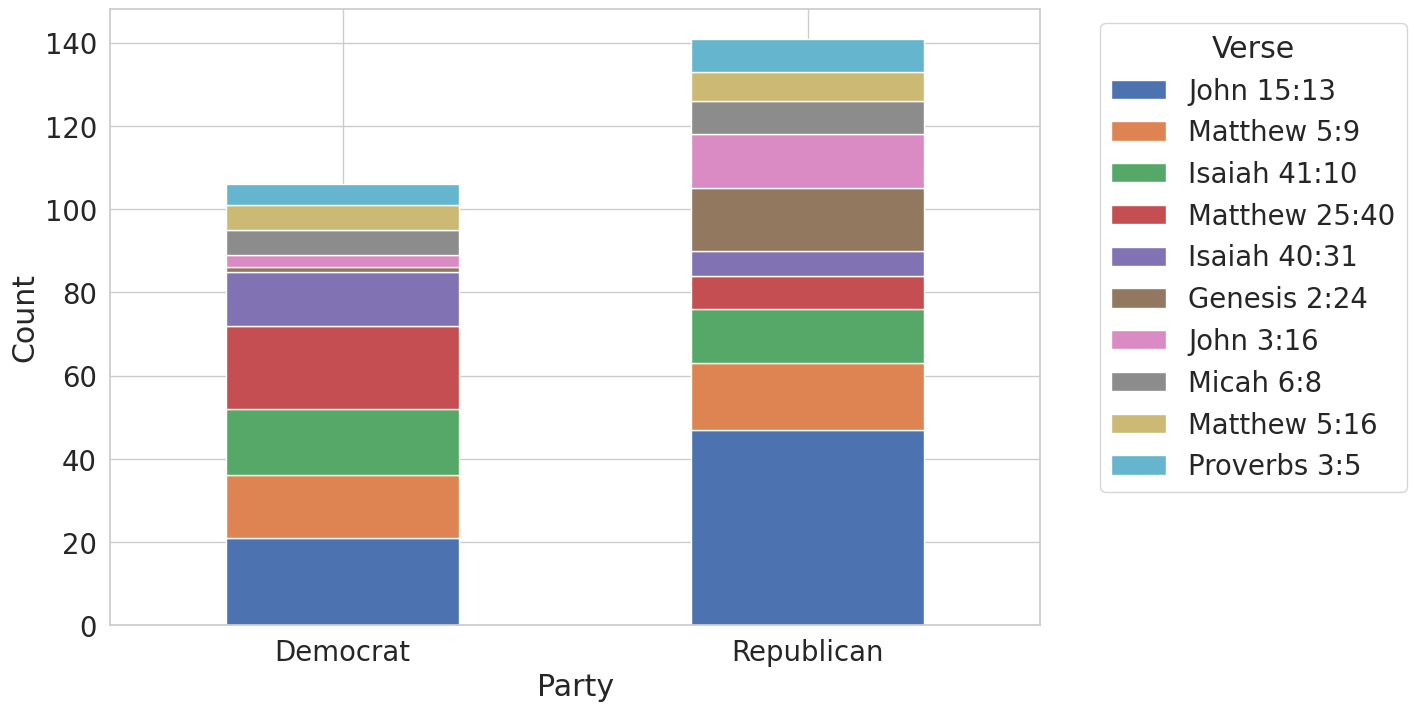

In [168]:
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.8)
filtered = filtered[(filtered['party'] == 'Democrat') | (filtered['party'] == 'Republican')]
verse_citations = filtered['verse_citation'].unique()
dummies = pd.get_dummies(filtered['verse_citation'])
filtered_scores = pd.concat([filtered, dummies], axis=1)

filtered_scores.head()
# Get the 10 most popular verse_citation columns
top_10_verse_citations = filtered_scores[verse_citations].sum().nlargest(10).index

# Filter the dataframe to include only the top 10 verse_citation columns
top_10_filtered_scores = filtered_scores[['party'] + list(top_10_verse_citations)]

# Calculate the counts for each verse_citation column
counts_by_party = top_10_filtered_scores.groupby('party')[top_10_verse_citations].sum()

# Plot the counts by party
counts_by_party.plot(kind='bar', stacked=True)
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Verse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [149]:
def get_yr(congress_idx):
    #idx_key = #int(congress_idx.replace('tensor(', '').replace(')', ''))
    if congress_idx in congress_df.index:
        year = congress_df.loc[congress_idx]['year']
        return year
    else:
        return 0

mpnet_scores['year'] = mpnet_scores['congress_idx'].progress_apply(get_yr)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2188231/2188231 [03:06<00:00, 11714.10it/s]


In [150]:
def get_party(congress_idx):
    #idx_key = int(congress_idx.replace('tensor(', '').replace(')', ''))
    idx_key = congress_idx
    if idx_key in congress_df.index:
        party = congress_df.loc[idx_key]['party']
        return party
    else:
        return 0

mpnet_scores['party'] = mpnet_scores['congress_idx'].progress_apply(get_party)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2188231/2188231 [02:49<00:00, 12930.82it/s]


In [151]:
def get_speaker(congress_idx):
    #idx_key = int(congress_idx.replace('tensor(', '').replace(')', ''))
    idx_key = congress_idx
    if idx_key in congress_df.index:
        speaker = congress_df.loc[idx_key]['speaker']
        return speaker
    else:
        return 0

mpnet_scores['speaker'] = mpnet_scores['congress_idx'].progress_apply(get_speaker)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2188231/2188231 [02:52<00:00, 12713.95it/s]


In [152]:
def get_date(congress_idx):
    #idx_key = int(congress_idx.replace('tensor(', '').replace(')', ''))
    idx_key = congress_idx
    if idx_key in congress_df.index:
        speaker = congress_df.loc[idx_key]['date']
        return speaker
    else:
        return 0

mpnet_scores['date'] = mpnet_scores['congress_idx'].progress_apply(get_date)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2188231/2188231 [02:59<00:00, 12188.26it/s]


In [153]:
congress_df.head()

,bio_id,congress_num,year,date,chamber,speaker,text,month_code,month,party,state,main_topic,official_index
0,L000397,116,2019,20190104,House,Ms. LOFGREN,"Ms. LOFGREN. Madam Speaker, I rise today to ho...",01,January,Democrat,CA,FunctionWords,0
1,W000804,116,2019,20190104,House,Mr. WITTMAN,"Mr. WITTMAN. Madam Speaker, I was not present ...",01,January,Republican,VA,VeteranCare,1
2,S001201,116,2019,20190104,House,Mr. SUOZZI,"Mr. SUOZZI. Madam Speaker, today is former Con...",01,January,Democrat,NY,Interational,2
3,S001199,116,2019,20190104,House,Mr. SMUCKER,"Mr. SMUCKER. Madam Speaker, I regret I was una...",01,January,Republican,PA,HonoringCommunityService,3
4,U000031,116,2019,20190104,House,Mr. UPTON,"Mr. UPTON. Madam Speaker, I was unavoidably de...",01,January,Republican,MI,IntelligenceInformation,4


In [265]:
mpnet_scores['is_cite'] = (mpnet_scores['cosine_similarity'] > 0.85)

In [154]:
filtered_scores = mpnet_scores[mpnet_scores['cosine_similarity'] > 0.8]

In [157]:
proportion = len(filtered_scores[filtered_scores['speaker'] == 'Mr. GOHMERT']) / len(filtered_scores)
speech_agg = filtered_scores.groupby('congress_idx').agg({'speaker': 'first'}).reset_index()
proportion_speech_level = len(speech_agg[speech_agg['speaker'] == 'Mr. GOHMERT']) / len(speech_agg['congress_idx'])
print(f"Proportion of references by Louis Gohmert: {proportion}")
print(f"Proportion of speeches referring to the Bible by Louis Gohmert: {proportion_speech_level}")

Proportion of references by Louis Gohmert: 0.045990566037735846
Proportion of speeches referring to the Bible by Louis Gohmert: 0.05090311986863711


In [267]:
filtered_scores.head()

,Unnamed: 0,congress_idx,text,most_similar_verse,cosine_similarity,verse_citation,testament_of_most_likely,party,year,speaker,is_cite,date
1067,1067,805,"As it says in the book of James, ``Blessed is ...",Blessed is the man that endureth temptation: f...,0.806908,James 1:12,New Testament,Republican,2019,Mr. WITTMAN,False,20190110
5872,5872,4496,May the words written in Matthew's Gospel comf...,Blessed are the peacemakers: for they shall be...,0.874124,Matthew 5:9,New Testament,Republican,2019,Mr. BYRNE,True,20190128
13972,13972,12249,"Guide us, thine own, aright Teach us by day, b...","Obey them that have the rule over you, and sub...",0.815433,Hebrews 13:17,New Testament,Republican,2019,Mr. SHIMKUS,False,20190311
20350,20350,19544,"We read in the New Testament these words, and ...","Greater love hath no man than this, that a man...",0.827184,John 15:13,New Testament,Democrat,2019,Mr. CARPER,False,20190501
23356,23356,22757,The Word tells us that the Lord is my strength...,Fear thou not; for I am with thee: be not dism...,0.833037,Isaiah 41:10,Old Testament,Republican,2019,Mr. HIGGINS of Louisiana,False,20190516


In [159]:
filtered_scores['count'] = 1
filtered_scores_agged = filtered_scores.groupby(['party','date']).agg('sum')
filtered_scores_agged.reset_index(inplace=True)

/tmp/ipykernel_1327885/2320564160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_scores['count'] = 1


In [160]:
pivot_data = filtered_scores.pivot_table(index='date', columns='party', values='count', aggfunc='sum', fill_value=0)

print(pivot_data)


party     Democrat  Independent  New Progressive  Republican  unknown
date                                                                 
19950216         0            0                0           2        0
19950303         1            0                0           0        0
19950307         0            0                0           1        0
19950323         3            0                0           0        0
19950425         1            0                0           0        0
...            ...          ...              ...         ...      ...
20230728         1            0                0           0        0
20230926         0            0                0           1        0
20231025         0            0                0           1        0
20231106         1            0                0           1        0
20231130         0            0                0           1        0

[502 rows x 5 columns]


In [161]:
pivot_data.index = pd.to_datetime(pivot_data.index)


testament_of_most_likely  New Testament  Old Testament  \
year                                                     
1995                                 35              7   
1996                                 15              3   
1997                                 20              4   
1998                                 28              8   
1999                                 33              5   
2000                                  8              1   
2001                                 22              7   
2002                                 19              5   
2003                                 13              6   
2004                                 18              6   
2005                                 16              4   
2006                                 27             13   
2007                                 27             16   
2008                                 15              4   
2009                                 15              4   
2010          

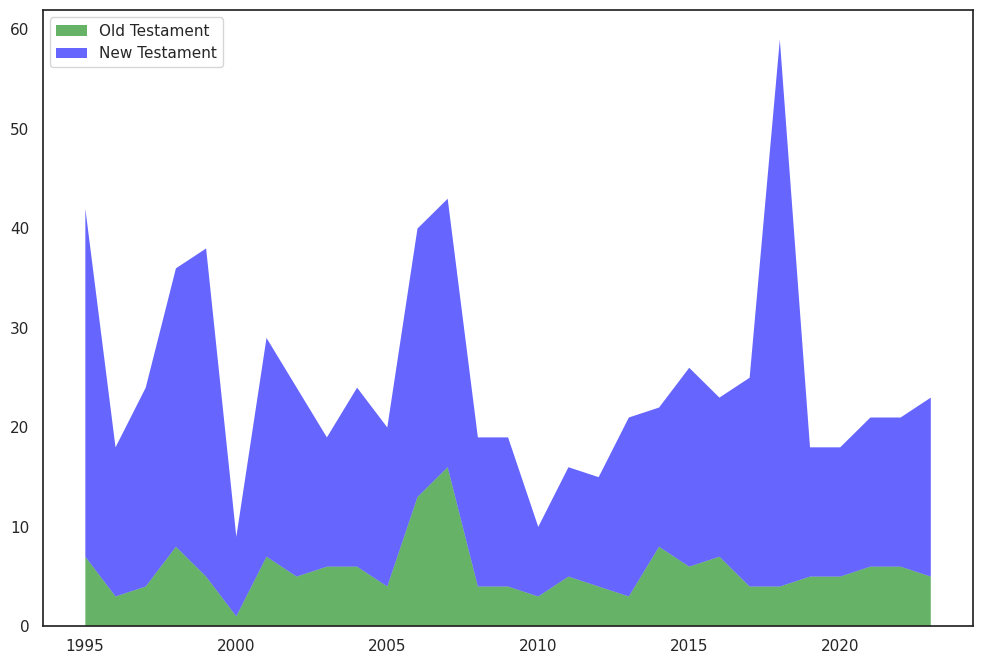

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pivot_testament_data = filtered_scores.pivot_table(index='year', columns='testament_of_most_likely', values='count', aggfunc='sum', fill_value=0)

print(pivot_testament_data)

sns.set_theme(style="white", palette=None)

pal = ["green", "blue"]
plt.stackplot(pivot_testament_data.index.to_list(), [pivot_testament_data['Old Testament'].to_list(), pivot_testament_data['New Testament'].to_list()], 
              labels=['Old Testament', 'New Testament'], colors=pal, linewidth=0, alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [218]:
pivot_john_1513_data = filtered_scores[filtered_scores['verse_citation'] == 'John 15:13'].pivot_table(index='year', columns='party', values='count', aggfunc='sum', fill_value=0)

In [219]:
pivot_john_1513_agg = filtered_scores[filtered_scores['verse_citation'] == 'John 15:13'].pivot_table(index='year', values='count', aggfunc='sum', fill_value=0)

In [220]:
pivot_john_1513_agg.head()

,count
year,
1995,1
1998,7
1999,1
2001,3
2002,1


In [222]:
filtered_scores['verse_citation'].value_counts()

verse_citation
John 15:13       68
Matthew 5:9      31
Isaiah 41:10     29
Matthew 25:40    28
Isaiah 40:31     20
                 ..
Galatians 6:9     1
Matthew 11:28     1
Psalm 19:1        1
Proverbs 1:7      1
Romans 5:6        1
Name: count, Length: 209, dtype: int64

In [223]:
list(filtered_scores[filtered_scores['verse_citation'] == 'John 15:13']['text'])

['We read in the New Testament these words, and I will paraphrase them: No greater love hath a man than his willingness to lay down his life for a friend.',
 'There is a verse that says, Greater love hath no man than this; that a man lay down his life for his friends.',
 "For, as it is written in John, ``Greater love hath no man than this, that a man lay down his life for his friends.''",
 'The Gospel of John, chapter 15, reads: Greater love hath no man than this: that a man lay down his life for his friends.',
 "``Greater love hath no man than this, that a man lay down his life for his friends.''",
 "In the Gospel of John, Jesus tells his disciples, ``Greater love hath no man than this, that a man lay down his life for his friends.''",
 'Greater love hath no man than this.',
 "Greater love has no one than this: to lay down one's life for one's friends.",
 'The Bible says: No greater love than this that a man or women lay down their lives for their friends.',
 "``Greater love hath no m

In [163]:
speech_level = filtered_scores.groupby('congress_idx').agg('first').reset_index() # group by speech

In [164]:
aggy_filtered_scores = speech_level.groupby(['date', 'party', 'verse_citation']).agg({'count': 'sum'}).reset_index()
pivot_data = aggy_filtered_scores.pivot_table(index='date', columns='party', values='count', aggfunc='sum', fill_value=0)

In [165]:
aggy_filtered_scores

,date,party,verse_citation,count
0,19950216,Republican,Matthew 5:9,1
1,19950303,Democrat,Isaiah 41:10,1
2,19950307,Republican,Mark 10:45,1
3,19950323,Democrat,Matthew 5:3,1
4,19950425,Democrat,Genesis 2:7,1
...,...,...,...,...
588,20230926,Republican,Psalm 24:1,1
589,20231025,Republican,1 Samuel 16:7,1
590,20231106,Democrat,1 Corinthians 2:9,1
591,20231106,Republican,1 Peter 4:10,1


In [166]:
# Group the data by date and calculate the sum of citations
date_citations = filtered_scores.groupby('date')['count'].sum()

# Find the dates with the most citations
dates_with_most_citations = date_citations.nlargest(5)

# Print the dates with the most citations
print(dates_with_most_citations)


date
20181212    36
20071105    10
20060427     9
19950907     8
19980728     8
Name: count, dtype: int64


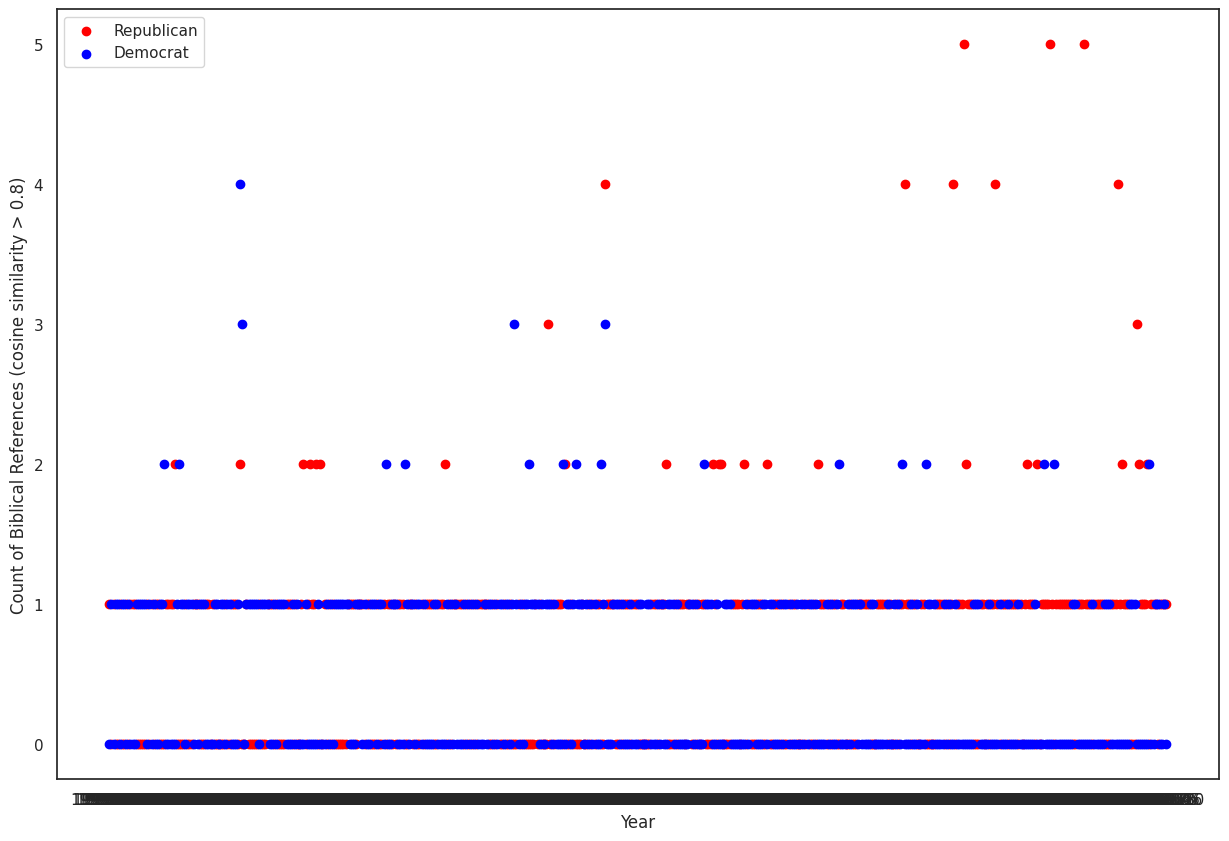

In [167]:
sns.set_theme(style="white", palette=None)

pal = ["red", "blue"]
plt.figure(figsize=(15, 10))
for party in ['Republican', 'Democrat']:
    plt.scatter(pivot_data.index, pivot_data[party], marker='o', label=party, color=pal.pop(0))

plt.xlabel('Year')
plt.ylabel('Count of Biblical References (cosine similarity > 0.8)')
plt.legend()
plt.show()

In [225]:
ref_name = ''

filtered_scores[filtered_scores['speaker'] == 'Mr. GOHMERT']
len(filtered_scores[filtered_scores['speaker'] == 'Mr. GOHMERT'])

39

In [226]:
filtered_scores[filtered_scores['speaker'] == 'Mr. THOMPSON of Mississippi']['verse_citation']

744965     Isaiah 41:10
877538      Matthew 5:6
877544      Matthew 5:8
877571     Matthew 5:16
1244220    Matthew 6:33
1261217    Matthew 6:33
2074421      Mark 16:15
Name: verse_citation, dtype: object

In [227]:
filtered_scores[filtered_scores['speaker'] == 'Mr. ADERHOLT']['verse_citation']

255257             John 15:13
357739        Colossians 3:16
835663          Matthew 11:28
898708             Psalm 24:1
898710            Psalm 51:10
898711            Romans 8:18
898712    1 Corinthians 10:12
898715              John 15:4
898851           Isaiah 40:31
898867           Matthew 5:16
Name: verse_citation, dtype: object

In [228]:
7 / len(filtered_scores.index)

0.008254716981132075

In [229]:
indices_2018 = filtered_scores[filtered_scores['year'] == 2018]['congress_idx']

In [230]:
len(set(indices_2018))

28

In [231]:
for i in indices_2018:
    print(congress_df.loc[i]['text'])
    print(congress_df.loc[i]['speaker'])

Mr. NORMAN. Mr. Speaker, I rise today with a heavy heart. In the early morning hours of Tuesday, January 16, four law enforcement officers were ambushed while responding to a domestic call in York County, South Carolina. Mr. Speaker, Detective Mike Doty, who had been with the York County Sheriff's Office for 12 years, was slain in the line of duty. Today, Detective Doty will be laid to rest, and our hearts grieve and mourn at the loss of one of our bravest. Our hearts especially ache for all his loved ones: James, Katherine, Joshua, Patricia, Michelle, Christina, Diana, Shane, and his twin brother, Chris, who served with him. They will continue to remain in our prayers. In the Gospel of Matthew 5:4, we are told that God heals the brokenhearted and binds up their wounds. May we take solace in this verse and always remember that the Lord is with us. May God bless the family of Michael Doty.
Mr. NORMAN
Mr. GOHMERT. Mr. Speaker, I want to thank my colleagues for such great words of encoura

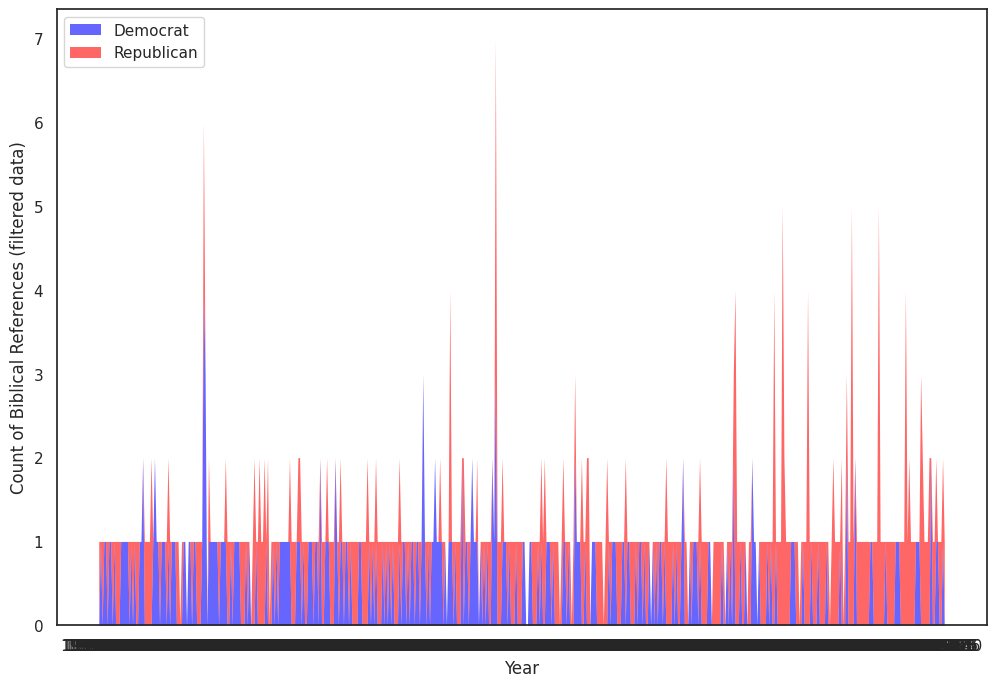

In [319]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", palette=None)

pal = ["blue", "red"]
plt.stackplot(pivot_data.index.to_list(), [pivot_data['Democrat'].to_list(), pivot_data['Republican'].to_list()], labels=['Democrat', 'Republican'], colors=pal, linewidth=0, alpha=0.6)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count of Biblical References (filtered data)')
plt.show()

In [233]:
occurrence_counts = filtered_scores['verse_citation'].value_counts()

NUM = 1
types_to_include = occurrence_counts[occurrence_counts > NUM].index
filtered_scores = filtered_scores[filtered_scores['verse_citation'].isin(types_to_include)]

In [234]:
counts_per_occurrence_type = filtered_scores.groupby(['year', 'verse_citation']).size().unstack(fill_value=0)

In [235]:
counts_per_occurrence_type.head()

verse_citation,1 Corinthians 10:12,1 Corinthians 10:31,1 Corinthians 1:18,1 John 3:16,1 John 4:10,1 John 4:16,1 John 4:8,1 Peter 4:10,1 Thessalonians 5:17,1 Timothy 6:10,...,Psalm 23:4,Psalm 24:1,Psalm 37:4,Psalm 51:10,Romans 10:17,Romans 12:2,Romans 1:16,Romans 1:17,Romans 1:20,Romans 5:8
year,,,,,,,,,,,,,,,,,,,,,
1995,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1996,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1999,1,1,0,1,1,1,1,0,0,1,...,0,1,0,2,0,1,1,1,1,0


/tmp/ipykernel_1648822/2613271528.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


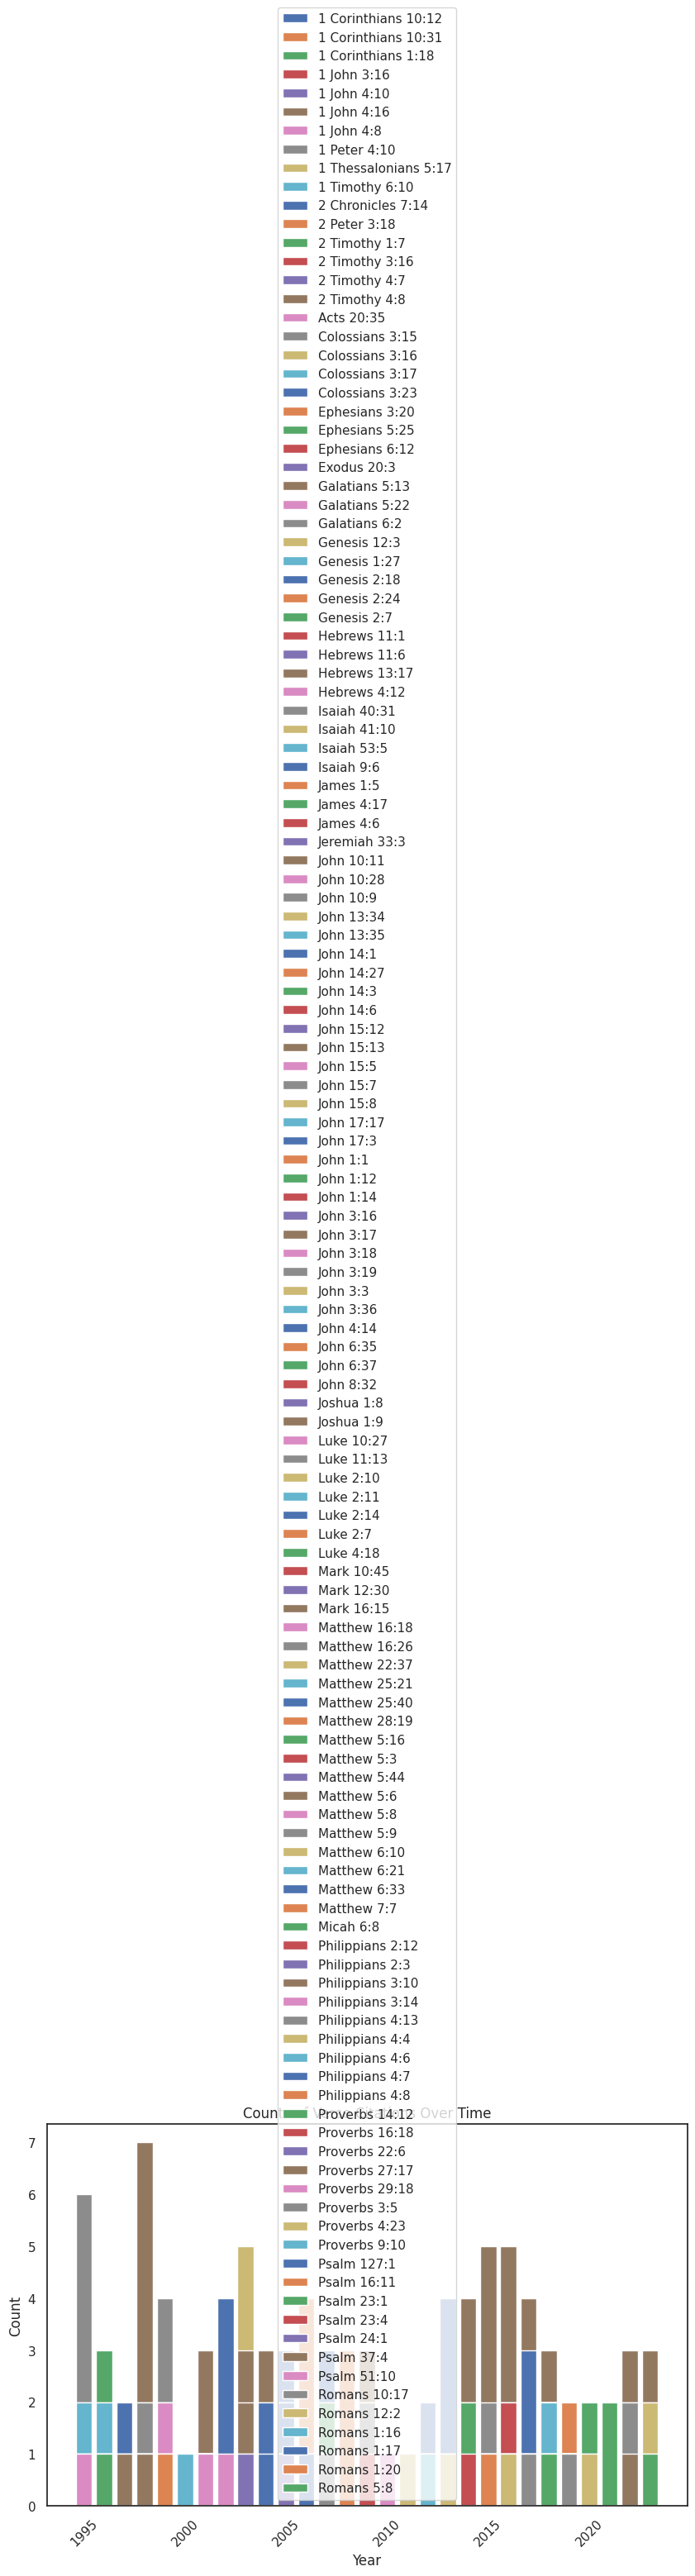

In [236]:
plt.figure(figsize=(10, 6))
for occurrence_type in counts_per_occurrence_type.columns:
    plt.bar(counts_per_occurrence_type.index, counts_per_occurrence_type[occurrence_type], label=occurrence_type)

plt.title('Counts of Verse Citations Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [379]:
counts_per_occurrence_type = filtered_scores.groupby(['year', 'party']).size().unstack(fill_value=0)

In [380]:
counts_per_occurrence_type

party,Democrat,Republican
year,,
1995,18,30
1996,14,7
1997,10,16
1998,27,10
1999,17,34
2000,4,4
2001,22,15
2002,19,10
2003,7,15


In [238]:
min(mpnet_scores['year'])

0

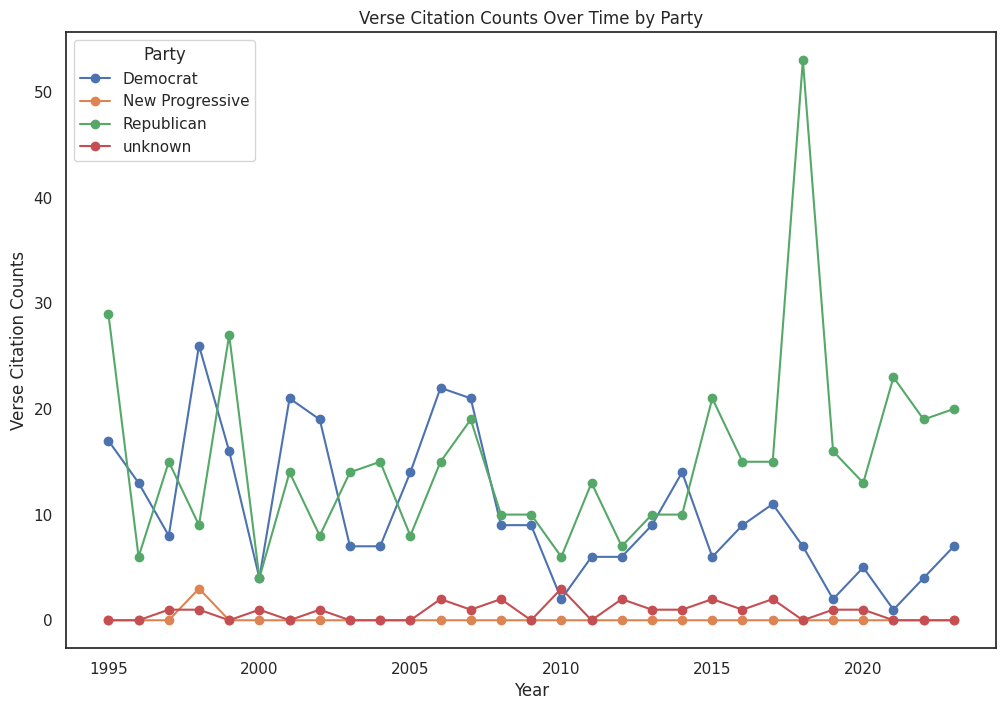

In [239]:
mpnet_scores = mpnet_scores[mpnet_scores['year'] > 1990]

verse_counts = filtered_scores.groupby(['year', 'party']).size().unstack(fill_value=0)
verse_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Verse Citation Counts')
plt.title('Verse Citation Counts Over Time by Party')
plt.legend(title='Party')
plt.show()


In [240]:
def get_max_cs(index_num, df):
    relevant_rows = df[df['congress_idx'] == index_num]
    if len(relevant_rows) > 0:
        max_cs = relevant_rows['cosine_similarity'].max()
        return max_cs
    else:
        return -1

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd

# Melt the data to long format
data_melted = pd.melt(filtered_scores, id_vars=['year'], var_name='Type', value_name='Value')

# Create the stacked longitudinal line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Year', y='Value', hue='Type', marker='o')

plt.title('Stacked Longitudinal Line Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Type')

plt.grid(True)
plt.show()

ValueError: Could not interpret value `Year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>